Thsi is stock of Tesla from 2015 to 2023. we will try to predict predict the price. Our main goal is to build a model that can predict what price we should sell at the market due to the fact that we have historial information on the price sold.

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader.data as web

In [82]:
df=pd.read_csv('TSLAA.csv')

In [83]:
df=pd.to_datetime(tesla_data.index)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-02-18,13.611333,13.744667,13.506667,13.630667,13.630667,40704000
1,2015-02-19,13.666667,14.162667,13.583333,14.114000,14.114000,77311500
2,2015-02-20,14.052000,14.506667,13.987333,14.474000,14.474000,89731500
3,2015-02-23,14.377333,14.546667,13.755333,13.822667,13.822667,127497000
4,2015-02-24,13.819333,13.819333,13.446667,13.607333,13.607333,99054000
...,...,...,...,...,...,...,...
2011,2023-02-13,194.419998,196.300003,187.610001,194.639999,194.639999,172475500
2012,2023-02-14,191.940002,209.820007,189.440002,209.250000,209.250000,216455700
2013,2023-02-15,211.759995,214.660004,206.110001,214.240005,214.240005,182108600
2014,2023-02-16,210.779999,217.649994,201.839996,202.039993,202.039993,229586500


In [136]:
#remove any rows in the dataframe df that contain missing values (i.e., NaN or Not a Number)
df = df.dropna()

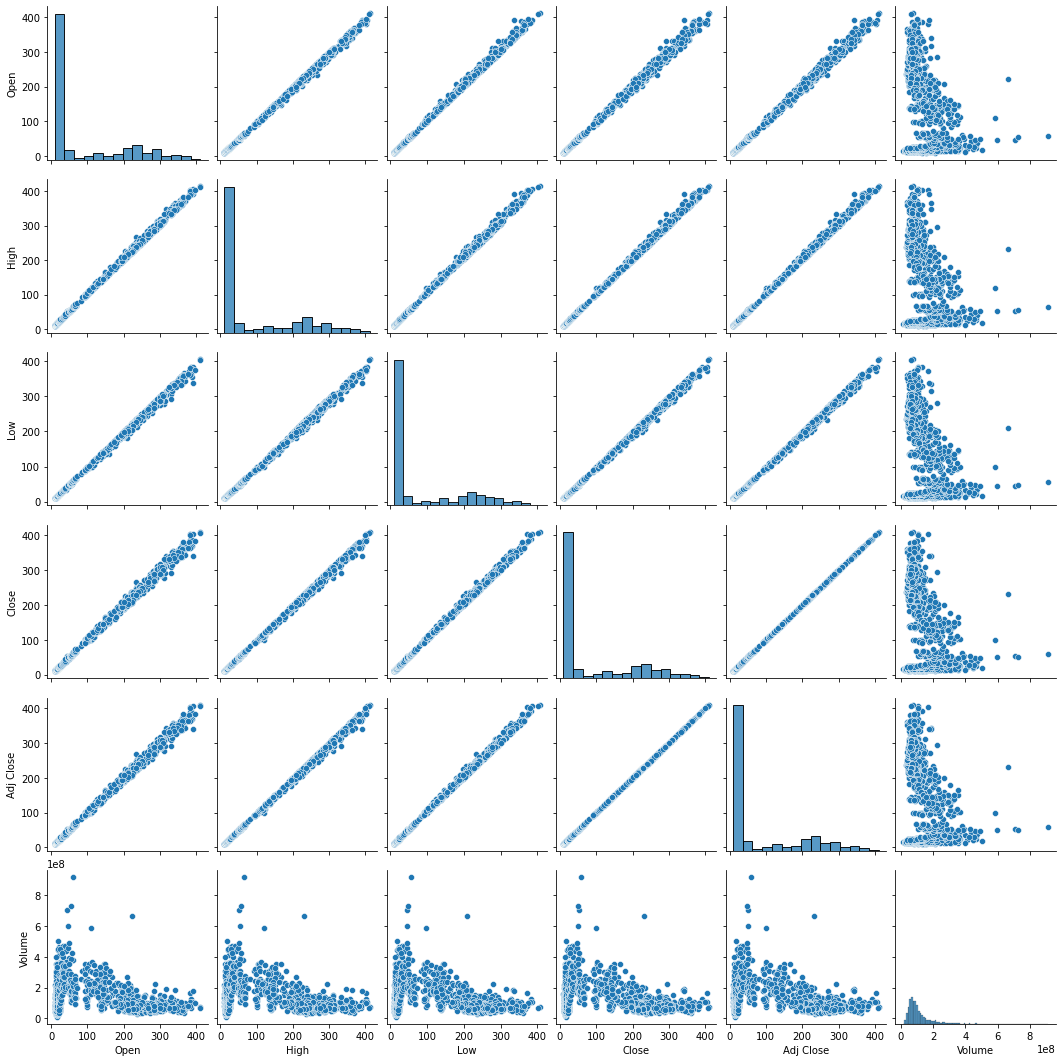

In [85]:
sns.pairplot(df)

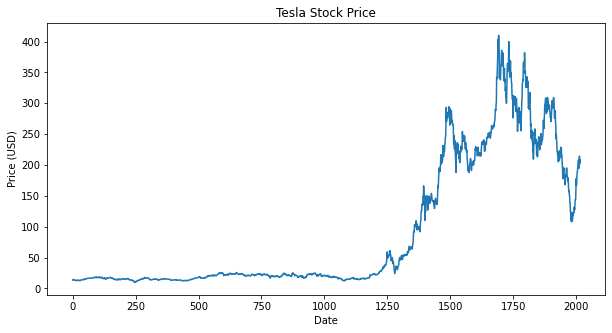

In [129]:
plt.figure(figsize=(10, 5))
plt.plot(df['Adj Close'])
plt.title('Tesla Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

In [86]:
from sklearn.model_selection import train_test_split

splits a dataset into two parts: a training set and a test set. The purpose of splitting the data into these two sets is to evaluate the performance of a machine learning model on data that it has not seen during training.

In [87]:
X = df[['Volume', 'Open', 'High', 'Low']].values
y = df['Close'].values

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [89]:
from sklearn.preprocessing import MinMaxScaler

In [90]:
scaler=MinMaxScaler()

In [91]:
scaler.fit(X_train)

MinMaxScaler()

In [92]:
X_train=scaler.transform(X_train)

In [93]:
X_test=scaler.transform(X_test)

In [137]:
#these are used to import the necessary classes from the Keras API of TensorFlow.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [95]:
model=Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

This code creates a sequential neural network model with four hidden layers, each containing four neurons with ReLU activation function, and a single output layer with linear activation function. The model is compiled using the RMSprop optimizer and mean squared error (MSE) loss function.

The purpose of this model is to perform regression, that is, to predict a continuous numerical output value based on the input features. The input features would need to be provided to the model separately, and the output would be a single continuous numerical value.

In [96]:
model.fit(x=X_train,y=y_train,epochs=250)

Epoch 1/250
45/45 [==============================] - 1s 1ms/step - loss: 20662.6582
Epoch 2/250
45/45 [==============================] - 0s 1ms/step - loss: 20512.9531
Epoch 3/250
45/45 [==============================] - 0s 1ms/step - loss: 20322.2793
Epoch 4/250
45/45 [==============================] - 0s 1ms/step - loss: 20073.6953
Epoch 5/250
45/45 [==============================] - 0s 1ms/step - loss: 19757.3047
Epoch 6/250
45/45 [==============================] - 0s 1ms/step - loss: 19371.7852
Epoch 7/250
45/45 [==============================] - 0s 1ms/step - loss: 18904.2598
Epoch 8/250
45/45 [==============================] - 0s 1ms/step - loss: 18333.4883
Epoch 9/250
45/45 [==============================] - 0s 1ms/step - loss: 17674.4688
Epoch 10/250
45/45 [==============================] - 0s 1ms/step - loss: 16938.9707
Epoch 11/250
45/45 [==============================] - 0s 1ms/step - loss: 16114.6279
Epoch 12/250
45/45 [==============================] - 0s 1ms/step - loss: 

Each epoch shows the loss of the model, which is the error between the predicted output and the actual output for a given input. The goal of the training is to minimize this loss. In this case, the loss seems to be decreasing with each epoch, which is a good sign that the model is learning from the training data. The training is set to run for 250 epochs, which means that the model will go through the entire dataset 250 times in order to learn the patterns in the data. After the training is complete, the model should be able to make accurate predictions for new input data.

In [97]:
loss_df=pd.DataFrame(model.history.history)

In [99]:
loss_df

,loss
0,20662.658203
1,20512.953125
2,20322.279297
3,20073.695312
4,19757.304688
...,...
245,13.032151
246,13.088268
247,13.071280
248,13.083625


<AxesSubplot:>

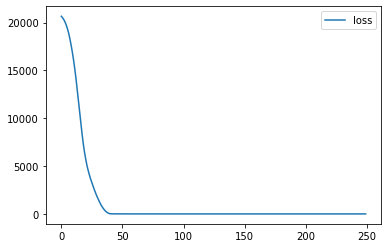

In [100]:
loss_df.plot()

In [101]:
model.evaluate(X_test,y_test,verbose=0)

10.263914108276367

In [102]:
model.evaluate(X_train,y_train,verbose=0)

13.1041259765625

In [103]:
test_predictions=model.predict(X_test)

19/19 [==============================] - 0s 1ms/step


In [105]:
test_predictions=pd.Series(test_predictions.reshape(605,))

In [106]:
test_predictions

0       23.461115
1       17.226982
2       13.084226
3      147.317673
4       12.427489
          ...    
600     14.181454
601     23.775410
602     27.332321
603     22.261299
604     22.570082
Length: 605, dtype: float32

In [107]:
pred_df=pd.DataFrame(y_test,columns=['Test True Y'])

In [108]:
pred_df=pd.concat([pred_df,test_predictions],axis=1)


In [109]:
pred_df

,Test True Y,0
0,23.968000,23.461115
1,16.712000,17.226982
2,13.157333,13.084226
3,147.383331,147.317673
4,12.494667,12.427489
...,...,...
600,14.192000,14.181454
601,23.878000,23.775410
602,27.039333,27.332321
603,22.799999,22.261299


In [110]:
pred_df.columns=['Test True Y','Model Predictions']

In [111]:
pred_df

,Test True Y,Model Predictions
0,23.968000,23.461115
1,16.712000,17.226982
2,13.157333,13.084226
3,147.383331,147.317673
4,12.494667,12.427489
...,...,...
600,14.192000,14.181454
601,23.878000,23.775410
602,27.039333,27.332321
603,22.799999,22.261299


Based on the prediction, it is a comparison between the true values and the predicted values of a model. it seems that the model is generally making predictions that are close to the true values.

<AxesSubplot:xlabel='Test True Y', ylabel='Model Predictions'>

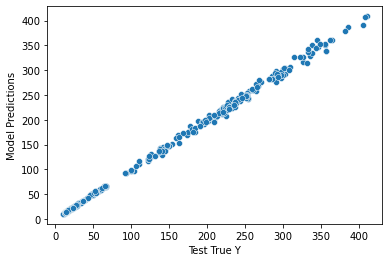

In [112]:
sns.scatterplot(x='Test True Y',y='Model Predictions',data=pred_df)

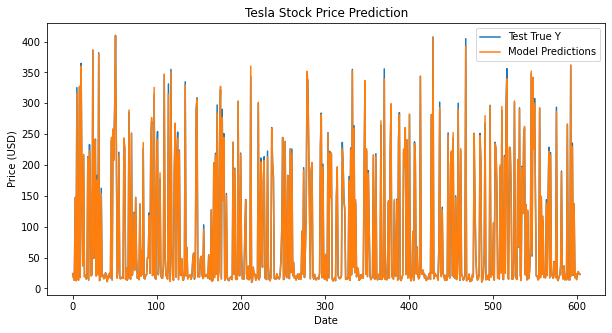

In [133]:
# Plot the predicted and actual stock prices
plt.figure(figsize=(10, 5))

plt.plot(pred_df)
plt.legend(['Test True Y', 'Model Predictions'])
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Tesla Stock Price Prediction')
plt.show()

In [138]:
# These functions from scikit-learn to evaluate the performance of the model.
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [114]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

1.5209218722595716

In [115]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])**0.5

3.203735548068108

In [116]:
new_stock=[[996,997,998,1000]]

In [117]:
new_stock=scaler.transform(new_stock)

In [118]:
model.predict(new_stock)

1/1 [==============================] - 0s 18ms/step


array([[993.99786]], dtype=float32)